<a href="https://colab.research.google.com/github/angelinux/fashion-GAN/blob/master/firstGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First GAN from fashion MNIST

In [1]:
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

import matplotlib.pyplot as plt
import sys
import numpy as np

Using TensorFlow backend.


In [2]:
(X_train, _), (_, _) = fashion_mnist.load_data()
# Rescale -1 to 1
X_train = X_train / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
latent_dim=500
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)

## Building components

In [0]:
def build_generator():
  model = Sequential()
  model.add(Dense(256, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024))
  model.add(LeakyReLU(alpha=0.2))
  model.add(BatchNormalization(momentum=0.8))
  #model.add(Dense(2048))
  #model.add(LeakyReLU(alpha=0.2))
  #model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(np.prod(img_shape), activation='tanh'))
  model.add(Reshape(img_shape))
  model.summary()
  noise = Input(shape=(latent_dim,))
  img = model(noise)
  return Model(noise, img)


def build_discriminator():
  model = Sequential()
  model.add(Flatten(input_shape=img_shape))
  #model.add(Dense(512))
  #model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(512))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()
  img = Input(shape=img_shape)
  validity = model(img)
  return Model(img, validity)

def sample_images(generator, epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r * c, latent_dim))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5 * gen_imgs + 0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
      for j in range(c):
          axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
          axs[i,j].axis('off')
          cnt += 1
  fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()


In [9]:
optimizer = Adam(0.0002, 0.5)

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               128256    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dense_11 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dense_12 (Dense)             (None, 1024)             

In [10]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


## Training


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.779865, acc.: 25.78%] [G loss: 0.600439]


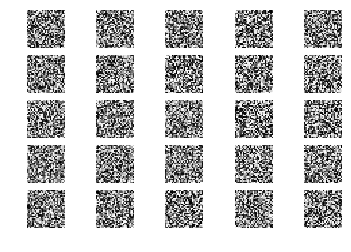

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.531138, acc.: 59.38%] [G loss: 0.637851]
2 [D loss: 0.423822, acc.: 69.14%] [G loss: 0.745739]
3 [D loss: 0.358247, acc.: 80.47%] [G loss: 0.905136]
4 [D loss: 0.320164, acc.: 87.89%] [G loss: 1.033616]
5 [D loss: 0.271177, acc.: 94.92%] [G loss: 1.119266]
6 [D loss: 0.231997, acc.: 97.66%] [G loss: 1.259878]
7 [D loss: 0.220813, acc.: 98.05%] [G loss: 1.388963]
8 [D loss: 0.181059, acc.: 98.83%] [G loss: 1.465330]
9 [D loss: 0.171730, acc.: 100.00%] [G loss: 1.609661]
10 [D loss: 0.152342, acc.: 100.00%] [G loss: 1.665047]
11 [D loss: 0.147813, acc.: 99.61%] [G loss: 1.726998]
12 [D loss: 0.135442, acc.: 99.61%] [G loss: 1.790164]
13 [D loss: 0.116772, acc.: 100.00%] [G loss: 1.886011]
14 [D loss: 0.111128, acc.: 100.00%] [G loss: 1.962835]
15 [D loss: 0.095677, acc.: 99.61%] [G loss: 1.984865]
16 [D loss: 0.104890, acc.: 99.61%] [G loss: 2.073764]
17 [D loss: 0.091782, acc.: 99.61%] [G loss: 2.134304]
18 [D loss: 0.085196, acc.: 100.00%] [G loss: 2.183822]
19 [D loss: 0.

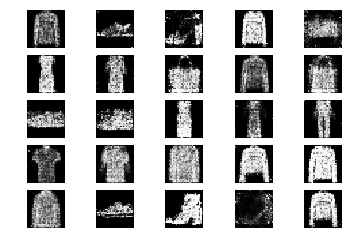

10001 [D loss: 0.643938, acc.: 61.33%] [G loss: 0.824957]
10002 [D loss: 0.659646, acc.: 57.81%] [G loss: 0.863161]
10003 [D loss: 0.656039, acc.: 64.45%] [G loss: 0.857632]
10004 [D loss: 0.673383, acc.: 58.98%] [G loss: 0.865725]
10005 [D loss: 0.664477, acc.: 57.42%] [G loss: 0.843278]
10006 [D loss: 0.669148, acc.: 59.38%] [G loss: 0.871811]
10007 [D loss: 0.674039, acc.: 57.03%] [G loss: 0.865625]
10008 [D loss: 0.688786, acc.: 56.25%] [G loss: 0.841001]
10009 [D loss: 0.642009, acc.: 63.28%] [G loss: 0.849300]
10010 [D loss: 0.673449, acc.: 56.64%] [G loss: 0.852912]
10011 [D loss: 0.660674, acc.: 60.94%] [G loss: 0.840791]
10012 [D loss: 0.681710, acc.: 53.91%] [G loss: 0.848027]
10013 [D loss: 0.665681, acc.: 59.38%] [G loss: 0.866333]
10014 [D loss: 0.656462, acc.: 62.89%] [G loss: 0.850107]
10015 [D loss: 0.674832, acc.: 55.47%] [G loss: 0.838643]
10016 [D loss: 0.672238, acc.: 59.77%] [G loss: 0.844125]
10017 [D loss: 0.684060, acc.: 55.08%] [G loss: 0.859231]
10018 [D loss:

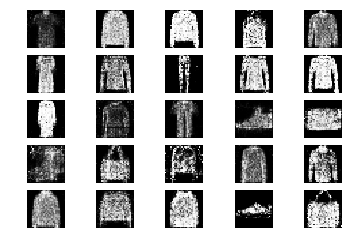

20001 [D loss: 0.689561, acc.: 58.98%] [G loss: 0.937219]
20002 [D loss: 0.642958, acc.: 61.33%] [G loss: 0.933125]
20003 [D loss: 0.644042, acc.: 66.41%] [G loss: 0.928304]
20004 [D loss: 0.643554, acc.: 62.11%] [G loss: 0.923804]
20005 [D loss: 0.655992, acc.: 63.67%] [G loss: 0.927236]
20006 [D loss: 0.660804, acc.: 58.20%] [G loss: 0.919181]
20007 [D loss: 0.647220, acc.: 63.28%] [G loss: 0.938648]
20008 [D loss: 0.632518, acc.: 65.62%] [G loss: 0.908991]
20009 [D loss: 0.646216, acc.: 62.50%] [G loss: 0.903265]
20010 [D loss: 0.677640, acc.: 57.03%] [G loss: 0.887921]
20011 [D loss: 0.645457, acc.: 62.89%] [G loss: 0.907261]
20012 [D loss: 0.666267, acc.: 57.03%] [G loss: 0.877153]
20013 [D loss: 0.624422, acc.: 64.84%] [G loss: 0.897933]
20014 [D loss: 0.633437, acc.: 61.72%] [G loss: 0.915662]
20015 [D loss: 0.623993, acc.: 69.14%] [G loss: 0.897601]
20016 [D loss: 0.627273, acc.: 64.45%] [G loss: 0.914802]
20017 [D loss: 0.666364, acc.: 59.77%] [G loss: 0.885201]
20018 [D loss:

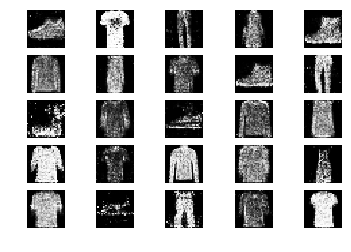

30001 [D loss: 0.596980, acc.: 66.02%] [G loss: 0.985072]
30002 [D loss: 0.636996, acc.: 61.33%] [G loss: 0.997610]
30003 [D loss: 0.645846, acc.: 60.55%] [G loss: 0.948577]
30004 [D loss: 0.632771, acc.: 62.11%] [G loss: 0.935953]
30005 [D loss: 0.635737, acc.: 64.84%] [G loss: 0.958020]
30006 [D loss: 0.644923, acc.: 63.28%] [G loss: 0.976040]
30007 [D loss: 0.643063, acc.: 62.89%] [G loss: 1.012294]
30008 [D loss: 0.615320, acc.: 66.02%] [G loss: 0.973929]
30009 [D loss: 0.645128, acc.: 60.16%] [G loss: 0.936968]
30010 [D loss: 0.641488, acc.: 61.33%] [G loss: 0.925867]
30011 [D loss: 0.650340, acc.: 60.16%] [G loss: 0.955411]
30012 [D loss: 0.644138, acc.: 61.72%] [G loss: 0.956566]
30013 [D loss: 0.640347, acc.: 61.72%] [G loss: 0.940128]
30014 [D loss: 0.669881, acc.: 59.38%] [G loss: 0.932468]
30015 [D loss: 0.644594, acc.: 64.45%] [G loss: 0.986946]
30016 [D loss: 0.613214, acc.: 68.36%] [G loss: 0.986042]
30017 [D loss: 0.628536, acc.: 64.45%] [G loss: 0.942574]
30018 [D loss:

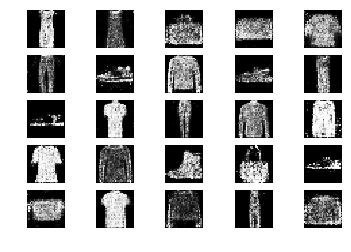

40001 [D loss: 0.663693, acc.: 58.20%] [G loss: 1.017343]
40002 [D loss: 0.617340, acc.: 64.06%] [G loss: 1.014438]
40003 [D loss: 0.620451, acc.: 66.02%] [G loss: 0.993541]
40004 [D loss: 0.596255, acc.: 66.02%] [G loss: 1.021560]
40005 [D loss: 0.637852, acc.: 64.45%] [G loss: 0.951840]
40006 [D loss: 0.644657, acc.: 62.11%] [G loss: 0.958879]
40007 [D loss: 0.590446, acc.: 69.14%] [G loss: 1.008182]
40008 [D loss: 0.608997, acc.: 64.84%] [G loss: 1.063876]
40009 [D loss: 0.613340, acc.: 64.45%] [G loss: 1.013367]
40010 [D loss: 0.628177, acc.: 63.28%] [G loss: 1.030998]
40011 [D loss: 0.634528, acc.: 62.50%] [G loss: 0.971145]
40012 [D loss: 0.653732, acc.: 58.20%] [G loss: 0.976141]
40013 [D loss: 0.586844, acc.: 68.36%] [G loss: 0.965773]
40014 [D loss: 0.628194, acc.: 66.02%] [G loss: 0.994477]
40015 [D loss: 0.608347, acc.: 66.02%] [G loss: 1.024542]
40016 [D loss: 0.596129, acc.: 68.36%] [G loss: 1.045764]
40017 [D loss: 0.580869, acc.: 71.09%] [G loss: 1.038487]
40018 [D loss:

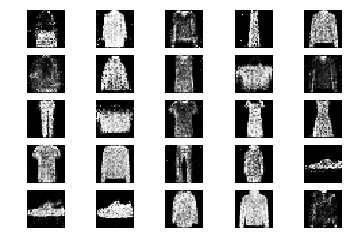

50001 [D loss: 0.620987, acc.: 63.28%] [G loss: 1.047782]
50002 [D loss: 0.620896, acc.: 66.41%] [G loss: 1.105178]
50003 [D loss: 0.623346, acc.: 64.06%] [G loss: 1.062822]
50004 [D loss: 0.613693, acc.: 64.45%] [G loss: 1.034614]
50005 [D loss: 0.612532, acc.: 65.62%] [G loss: 1.068101]
50006 [D loss: 0.617058, acc.: 66.41%] [G loss: 0.955466]
50007 [D loss: 0.649965, acc.: 63.67%] [G loss: 1.127446]
50008 [D loss: 0.578880, acc.: 67.97%] [G loss: 1.087964]
50009 [D loss: 0.630763, acc.: 62.50%] [G loss: 1.091117]
50010 [D loss: 0.609137, acc.: 66.02%] [G loss: 1.090237]
50011 [D loss: 0.612971, acc.: 64.45%] [G loss: 1.027216]
50012 [D loss: 0.663012, acc.: 57.81%] [G loss: 1.041727]
50013 [D loss: 0.561238, acc.: 72.66%] [G loss: 1.040522]
50014 [D loss: 0.637468, acc.: 66.02%] [G loss: 1.050645]
50015 [D loss: 0.601056, acc.: 65.62%] [G loss: 1.026388]
50016 [D loss: 0.582137, acc.: 65.62%] [G loss: 1.075053]
50017 [D loss: 0.582677, acc.: 67.97%] [G loss: 1.106678]
50018 [D loss:

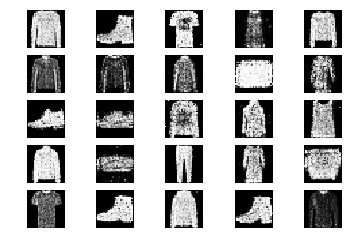

60001 [D loss: 0.576330, acc.: 70.31%] [G loss: 1.177161]
60002 [D loss: 0.601988, acc.: 69.14%] [G loss: 1.141344]
60003 [D loss: 0.595372, acc.: 67.97%] [G loss: 1.064970]
60004 [D loss: 0.581147, acc.: 67.19%] [G loss: 1.092892]
60005 [D loss: 0.572667, acc.: 69.53%] [G loss: 1.164707]
60006 [D loss: 0.622185, acc.: 64.84%] [G loss: 1.067509]
60007 [D loss: 0.571638, acc.: 71.48%] [G loss: 1.050593]
60008 [D loss: 0.582689, acc.: 67.58%] [G loss: 1.070629]
60009 [D loss: 0.579456, acc.: 68.36%] [G loss: 1.143028]
60010 [D loss: 0.630247, acc.: 66.02%] [G loss: 1.051153]
60011 [D loss: 0.587183, acc.: 66.80%] [G loss: 1.088977]
60012 [D loss: 0.602729, acc.: 67.19%] [G loss: 1.120739]
60013 [D loss: 0.538643, acc.: 75.00%] [G loss: 1.182772]
60014 [D loss: 0.574468, acc.: 69.14%] [G loss: 1.140628]
60015 [D loss: 0.647612, acc.: 62.50%] [G loss: 1.172449]
60016 [D loss: 0.623070, acc.: 64.45%] [G loss: 1.139914]
60017 [D loss: 0.621151, acc.: 66.41%] [G loss: 1.065997]
60018 [D loss:

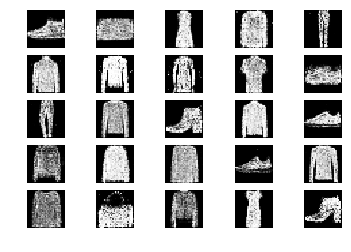

70001 [D loss: 0.565295, acc.: 70.70%] [G loss: 1.156754]
70002 [D loss: 0.602600, acc.: 65.62%] [G loss: 1.170795]
70003 [D loss: 0.591162, acc.: 70.70%] [G loss: 1.285318]
70004 [D loss: 0.527650, acc.: 74.22%] [G loss: 1.168309]
70005 [D loss: 0.589825, acc.: 68.75%] [G loss: 1.212527]
70006 [D loss: 0.530753, acc.: 73.83%] [G loss: 1.327023]
70007 [D loss: 0.539658, acc.: 73.44%] [G loss: 1.310747]
70008 [D loss: 0.574778, acc.: 72.27%] [G loss: 1.207672]
70009 [D loss: 0.566721, acc.: 67.19%] [G loss: 1.150336]
70010 [D loss: 0.639514, acc.: 62.50%] [G loss: 1.138644]
70011 [D loss: 0.565545, acc.: 70.70%] [G loss: 1.162054]
70012 [D loss: 0.523073, acc.: 76.95%] [G loss: 1.215503]
70013 [D loss: 0.594940, acc.: 66.02%] [G loss: 1.146382]
70014 [D loss: 0.581046, acc.: 66.41%] [G loss: 1.166882]
70015 [D loss: 0.571334, acc.: 69.92%] [G loss: 1.173534]
70016 [D loss: 0.640644, acc.: 60.94%] [G loss: 1.299610]
70017 [D loss: 0.568710, acc.: 71.88%] [G loss: 1.190102]
70018 [D loss:

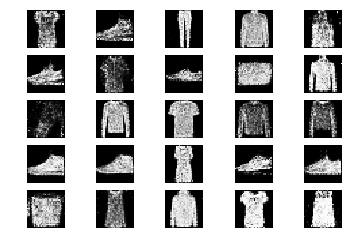

80001 [D loss: 0.569200, acc.: 69.14%] [G loss: 1.214107]
80002 [D loss: 0.566684, acc.: 69.92%] [G loss: 1.228536]
80003 [D loss: 0.539361, acc.: 70.31%] [G loss: 1.333357]
80004 [D loss: 0.551290, acc.: 72.27%] [G loss: 1.250228]
80005 [D loss: 0.582933, acc.: 68.75%] [G loss: 1.315338]
80006 [D loss: 0.542012, acc.: 73.44%] [G loss: 1.314084]
80007 [D loss: 0.546217, acc.: 71.09%] [G loss: 1.181885]
80008 [D loss: 0.554838, acc.: 69.92%] [G loss: 1.278707]
80009 [D loss: 0.581260, acc.: 71.88%] [G loss: 1.224946]
80010 [D loss: 0.534013, acc.: 75.00%] [G loss: 1.375075]
80011 [D loss: 0.544992, acc.: 72.27%] [G loss: 1.225420]
80012 [D loss: 0.581532, acc.: 68.75%] [G loss: 1.302721]
80013 [D loss: 0.535498, acc.: 75.00%] [G loss: 1.336341]
80014 [D loss: 0.573948, acc.: 69.14%] [G loss: 1.285895]
80015 [D loss: 0.547960, acc.: 71.88%] [G loss: 1.222312]
80016 [D loss: 0.568423, acc.: 70.70%] [G loss: 1.289059]
80017 [D loss: 0.542820, acc.: 73.05%] [G loss: 1.340425]
80018 [D loss:

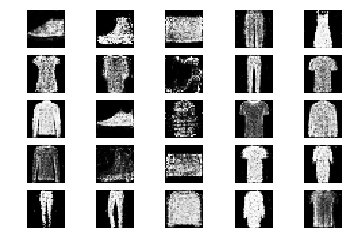

90001 [D loss: 0.567386, acc.: 68.36%] [G loss: 1.281445]
90002 [D loss: 0.561140, acc.: 72.27%] [G loss: 1.348525]
90003 [D loss: 0.593228, acc.: 67.97%] [G loss: 1.339455]
90004 [D loss: 0.599707, acc.: 68.75%] [G loss: 1.380623]
90005 [D loss: 0.575338, acc.: 69.92%] [G loss: 1.337773]
90006 [D loss: 0.582675, acc.: 67.19%] [G loss: 1.307333]
90007 [D loss: 0.567296, acc.: 67.19%] [G loss: 1.294833]
90008 [D loss: 0.544447, acc.: 70.31%] [G loss: 1.374130]
90009 [D loss: 0.541842, acc.: 71.09%] [G loss: 1.224627]
90010 [D loss: 0.568256, acc.: 67.97%] [G loss: 1.334173]
90011 [D loss: 0.530110, acc.: 76.17%] [G loss: 1.359550]
90012 [D loss: 0.584341, acc.: 67.19%] [G loss: 1.269174]
90013 [D loss: 0.548470, acc.: 69.53%] [G loss: 1.147075]
90014 [D loss: 0.558410, acc.: 71.09%] [G loss: 1.256659]
90015 [D loss: 0.539507, acc.: 71.48%] [G loss: 1.260989]
90016 [D loss: 0.570310, acc.: 70.70%] [G loss: 1.251002]
90017 [D loss: 0.554656, acc.: 70.31%] [G loss: 1.279996]
90018 [D loss:

In [11]:
epochs=100000
batch_size = 128
sample_interval = 10000


# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))



for epoch in range(epochs):
  # ---------------------
  #  Train Discriminator
  # ---------------------

  # Select a random batch of images
  idx = np.random.randint(0, X_train.shape[0], batch_size)
  imgs = X_train[idx]

  noise = np.random.normal(0, 1, (batch_size, latent_dim))

  # Generate a batch of new images
  gen_imgs = generator.predict(noise)

  # Train the discriminator
  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

  # ---------------------
  #  Train Generator
  # ---------------------

  noise = np.random.normal(0, 1, (batch_size, latent_dim))

  # Train the generator (to have the discriminator label samples as valid)
  g_loss = combined.train_on_batch(noise, valid)

  # Plot the progress
  print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  # If at save interval => save generated image samples
  if epoch % sample_interval == 0:
      sample_images(generator, epoch)

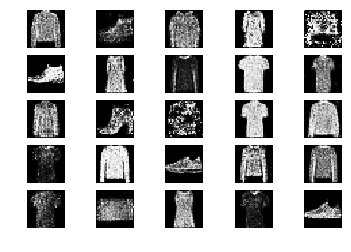

In [12]:
sample_images(generator, epochs)

### Random generated t-shirt

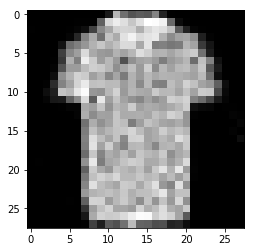

In [24]:
noise = np.random.normal(0, 1, (1, latent_dim))
gen_img = generator.predict(noise)
# Rescale images 0 - 1
gen_img = 0.5 * gen_img + 0.5
plt.figure()
plt.imshow(gen_img[0, :,:,0], cmap='gray')
plt.show()

### Random generated shoe

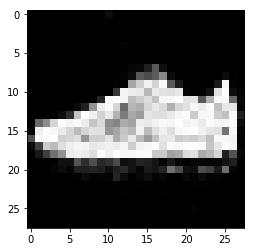

In [32]:
noise = np.random.normal(0, 1, (1, latent_dim))
gen_img = generator.predict(noise)
# Rescale images 0 - 1
gen_img = 0.5 * gen_img + 0.5
plt.figure()
plt.imshow(gen_img[0, :,:,0], cmap='gray')
plt.show()